# Identificação de pragas em colheitas

1 - Importação das bibliotecas:

In [260]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

2 - Definição dos parâmetros dos Datasets e leitura dos arquivos:

In [158]:
# Nome dos arquivos que serão lidos
amargoso = 'data/_amargoso.csv'
braquiaria = 'data/_braquiaria.csv'
caruru = 'data/_caruru.csv'
juazeiro = 'data/_juazeiro.csv'
leiteiro = 'data/_leiteiro.csv'

# Criação dos Dataframes
df_amargoso = pd.read_csv(amargoso, sep=',')
df_braquiaria = pd.read_csv(braquiaria, sep=',')
df_caruru = pd.read_csv(caruru, sep=',')
df_juazeiro = pd.read_csv(juazeiro, sep=',')
df_leiteiro = pd.read_csv(leiteiro, sep=',')

# Renomear as colunas dos Dataframes:
vec_dfs = [df_amargoso, df_braquiaria, df_caruru, df_juazeiro, df_leiteiro]

for df in vec_dfs:
    df.rename(columns={'Sample num' : 'id', 'F1 (410nm)' : 'f1', 'F2 (440nm)' : 'f2', 
                       'F3 (470nm)' : 'f3', 'F4 (510nm)' : 'f4', 'F5 (550nm)' : 'f5', 
                       'F6 (583nm)' : 'f6', 'F7 (620nm)' : 'f7', 'F8 (670nm)' : 'f8', 
                       'CLEAR' : 'clear', 'SAIDA' : 'y'}, inplace = True)
    df.drop('Function', axis=1, inplace=True)

# Tipos de pragas
# - A = Amargoso
# - C = Caruru
# - J = Juazeiro
# - L = Leiteiro
# - N = Sem praga

df_amargoso['tipo'] = 'A'
df_braquiaria['tipo'] = 'N'
df_caruru['tipo'] = 'C'
df_juazeiro['tipo'] = 'J'
df_leiteiro['tipo'] = 'L'

3 - Pré-processamento dos dados

In [236]:
# Converter dados de Inteiro e Object para Float
def converter_colunas_float(df):
    df['f1'] = df.f1.astype(np.float64)
    df['f2'] = df.f2.astype(np.float64)
    df['f3'] = df.f3.astype(np.float64)
    df['f4'] = df.f4.astype(np.float64)
    df['f5'] = df.f5.astype(np.float64)
    df['f6'] = df.f6.astype(np.float64)
    df['f7'] = df.f7.astype(np.float64)
    df['f8'] = df.f8.astype(np.float64)
    df['clear'] = pd.to_numeric(df['clear'],errors='coerce')
    df['y'] = pd.to_numeric(df['y'],errors='coerce')
    
    return df

# Dados Faltantes
# - Verificação da existência de dados faltantes
# - - Substituição de dados faltantes pelo o valor obtido com interpolação linear

def inserir_dados_faltantes(df):
    if df['f1'].isna().any():
        df['f1'] = df.f1.interpolate(method='linear')
    if df['f2'].isna().any():
        df['f2'] = df.f2.interpolate(method='linear')
    if df['f3'].isna().any():
        df['f3'] = df.f3.interpolate(method='linear')
    if df['f4'].isna().any():
        df['f4'] = df.f4.interpolate(method='linear')
    if df['f5'].isna().any():
        df['f5'] = df.f5.interpolate(method='linear')
    if df['f6'].isna().any():
        df['f6'] = df.f6.interpolate(method='linear')
    if df['f7'].isna().any():
        df['f7'] = df.f7.interpolate(method='linear')
    if df['f8'].isna().any():
        df['f8'] = df.f8.interpolate(method='linear')
    if df['clear'].isna().any():
        df['clear'] = df.clear.interpolate(method='linear')
    
    return df

#-------------------------------------------------------------------------

# Vetor de Dataframes
vec_dfs = [df_amargoso, df_braquiaria, df_caruru, df_juazeiro, df_leiteiro]

vec_df_preprocessados = []

for df in vec_dfs:
    
    # Converter os dados para float
    df = converter_colunas_float(df)

    # Inserir os dados faltantes via interpolação linear
    df = inserir_dados_faltantes(df)
    
    # Inserir os Dataframes Pré-processados em um vetor
    vec_df_preprocessados.append(df)

# Concatenar todos os Dataframes
df_preprocessado = pd.concat(vec_df_preprocessados)

# Conversão de dados não numéricos para numéricos
conversor = LabelEncoder()
df_preprocessado['tipo'] = conversor.fit_transform(df_preprocessado['tipo'])

# Resetar o index do Dataframe
df_preprocessado = df_preprocessado.reset_index()

# Seleção dos parâmetros mais interessantes
df_preprocessado = df_preprocessado[['f1','f2','f3','f4','f5','f6','f7','f8','clear','y','tipo']]

# Salvar o DataFrame Pré-processado
df_preprocessado.to_csv('df_preprocessado.csv')

In [237]:
# - Informações relevantes sobre os dados pré-processados
print('-------Total de Linhas do Dataframe Pré-processado-------')
print(len(df_preprocessado))
print('-------Pré-visualização dos dados do Dataframe-------')
print(df_preprocessado.head())
print('-------Descrição dos tipos das variáveis contidas no Dataframe-------')
print(df_preprocessado.dtypes)
print('-------Descrição do Dataframe-------')
print(df_preprocessado.describe())

-------Total de Linhas do Dataframe Pré-processado-------
637
-------Pré-visualização dos dados do Dataframe-------
      f1     f2     f3     f4     f5     f6      f7      f8   clear  y  tipo
0  366.0  471.0  632.0  796.0  999.0  967.0  1326.0  1532.0  7318.0  1     0
1  336.0  459.0  595.0  811.0  987.0  953.0  1356.0  1478.0  7284.0  1     0
2  333.0  470.0  610.0  849.0  992.0  958.0  1472.0  1487.0  7427.0  1     0
3  337.0  453.0  589.0  774.0  933.0  949.0  1316.0  1406.0  6916.0  1     0
4  329.0  454.0  585.0  783.0  948.0  951.0  1311.0  1490.0  6953.0  1     0
-------Descrição dos tipos das variáveis contidas no Dataframe-------
f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
clear    float64
y          int64
tipo       int64
dtype: object
-------Descrição do Dataframe-------
               f1          f2          f3           f4           f5  \
count  637.000000  637.000000  637.000000  

4 - Análise de dados

In [238]:
# Correlação entre os dados
# - Fazer a correlação de Pearson para verificar a se há correlação entre os dados.
# - - - - - - - - - - Níveis de Correlação - - - - - - - - -
# - - 0.9 para mais ou para menos indica uma correlação muito forte.
# - - 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
# - - 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# - - 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
# - - 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Realizar a correlação entre as colunas
df_correlacao  = df_preprocessado.corr()

HeatMap

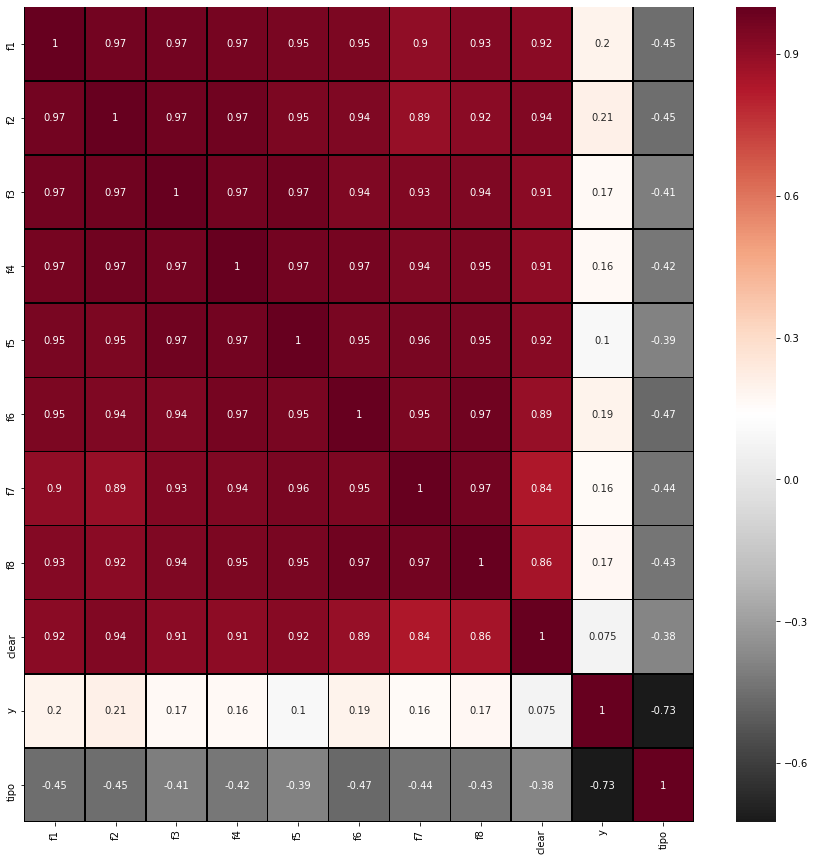

In [239]:
# Visualização das correlações entre das labels do Dataframe através de um heatmap:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(df_correlacao, annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.savefig("heatmap_correlation.png", dpi=150) 
plt.show()

Conclusão: As features de "f1" até "clear" possuem uma correlação forte, logo isso é um bom indício que essas features são representativas, no entanto, como na base de dados possui poucos exemplos balanceados, ou seja há aproximadamente 120 casos do tipo braquiaria e mais de 500 casos de exemplos de dados com praga, logo isso impacta na correlação das features com as saídas.

PCA (Primary Component Analysis)

In [261]:
# --- PCA ---
def PCA_OK(dados, reducao_dimensionalidade):
    
    X = dados
    #*********************NORMALIZAÇÃO*********************
    verde_norm = StandardScaler().fit_transform(X)
    
    #***************MATRIZ DE COVARIÂNCIA*******************
    matriz_convariance = np.cov(verde_norm.T)
    
    
    #***********AUTOVETORES E AUTOVALORES******************
    auto_valores, auto_vetores = np.linalg.eig (matriz_convariance)
    
    #definindo um vetor com a ordem dos auto-valores de forma decrescente 
    orden_autoval = np.argsort(auto_valores)[::-1]
    
    #ordenando os auto-vetores conforme a ordem dos auto valores
    auto_vetores = auto_vetores[:,orden_autoval]
    
    #ordenando os auto-vetores conforme a ordem dos auto valores
    auto_valores = auto_valores[orden_autoval]
    
    #reduzindo a dimensionalidade
    auto_vetores = auto_vetores[:, :reducao_dimensionalidade]
    
    #transposta da multiplicação da transposta dos auto_vetores com a transposta dos dados normalizados
    resultado = np.dot(auto_vetores.T, verde_norm.T).T
    
    return resultado

In [253]:
# ---Visualização---
def Visualizacao(nome_grafico,dados, classes, nomes_classes):

    colors = ['navy', 'turquoise']
    lw = 2
    
    plt.figure()
    plt.title(nome_grafico)
    for color, i, target_name in zip(colors, [0, 1], nomes_classes):
        plt.scatter(dados[classes == i, 0], dados[classes == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()


     principal component 1  principal component 2
0                 2.872923              -0.187927
1                 2.530479              -0.336483
2                 2.885783              -0.488838
3                 2.103225              -0.310778
4                 2.191546              -0.419554
..                     ...                    ...
632              -1.155519              -0.085581
633              -0.865372              -0.012109
634               0.240411               0.038209
635               0.556620              -0.043592
636              -1.656809              -0.175862

[637 rows x 2 columns]
     principal component 1  principal component 2  y
0                 2.872923              -0.187927  1
1                 2.530479              -0.336483  1
2                 2.885783              -0.488838  1
3                 2.103225              -0.310778  1
4                 2.191546              -0.419554  1
..                     ...                    ... ..
632  

/home/thiago-costa/.local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


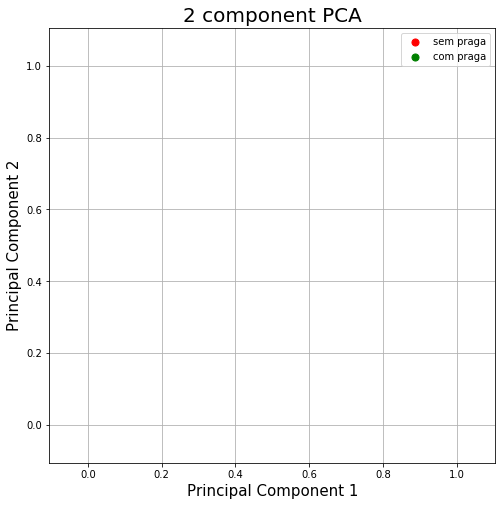

In [267]:
#*****************VERDE SOBRE VERDE*****************
vsv_features = ['f1','f2','f3','f4','f5','f6','f7','f8','clear']
X = df_preprocessado.loc[:, vsv_features].values
Y = df_preprocessado.loc[:,['y']].values
target_names_features = ['y']

# Normalizacao
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_preprocessado[['y']]], axis = 1)

print(principalDf)
print(finalDf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['sem praga', 'com praga']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
